# Introduction

In this project, I will build a neural network of My own design to evaluate the MNIST dataset.


## Installation

In [ ]:
# Restart the Kernel after you execute this command.

!python -m pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.0 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


## Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset



In [ ]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create training set and define training dataloader
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.09MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.04MB/s]


## preprocessing



I chose the following preprocessing steps:
1. **ToTensor()**: Converts PIL images to PyTorch tensors and scales pixel values from [0,255] to [0,1]
2. **Normalize((0.5,), (0.5,))**: Normalizes the tensor with mean=0.5 and std=0.5, transforming the range from [0,1] to [-1,1]. This helps the model converge faster during training.

These transforms are standard for MNIST and help improve training stability and convergence.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.


In [ ]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Training set size: 60000
Test set size: 10000
Image shape: torch.Size([1, 28, 28])
2


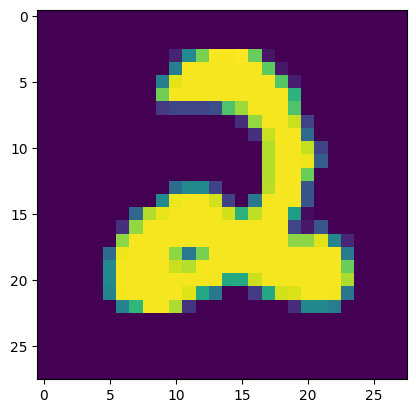

6


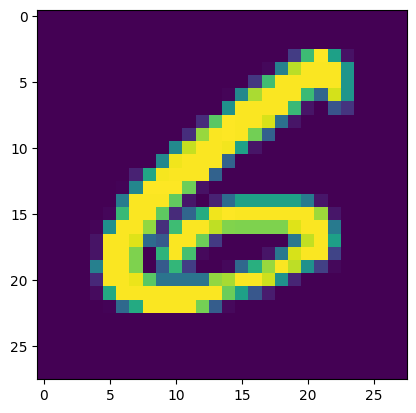

0


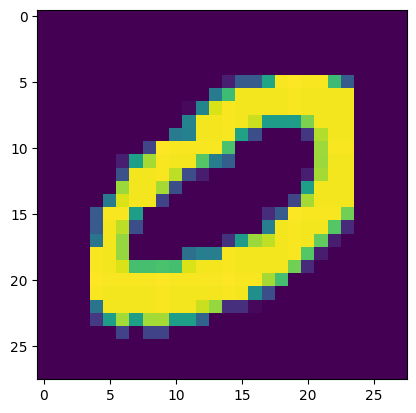

5


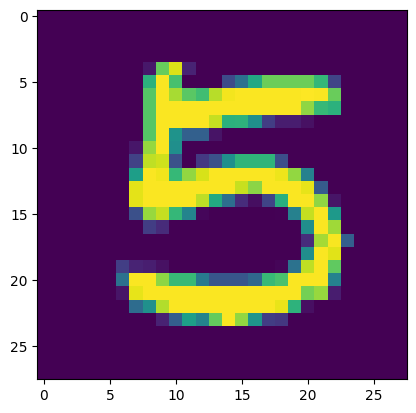

2


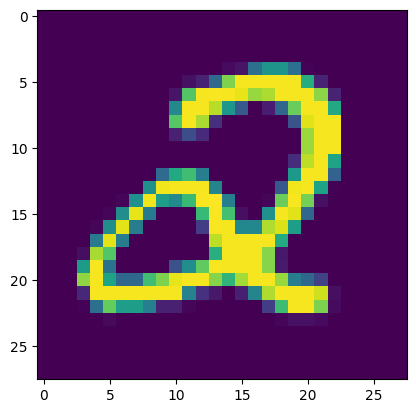

Batch shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])


In [ ]:
# Explore data
print(f"Training set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")
print(f"Image shape: {train_set[0][0].shape}")

# Show some images
show5(train_loader)

# Additional exploration
images, labels = next(iter(train_loader))
print(f"Batch shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

## Build The Neural Network


In [ ]:
# Build your Neural Network
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Instantiate the model
model = MNISTNet()

Specify a loss function and an optimizer, and instantiate the model.



In [ ]:
# Specify loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(model)

MNISTNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


## Running The Neural Network


In [ ]:
# Running your Neural Network
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_losses = []
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 250 == 0:
            print(f'Epoch: {epoch+1}/{epochs} | Batch: {batch_idx}/{len(train_loader)} | Loss: {loss.item():.6f}')

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f'Epoch {epoch+1} completed. Average Loss: {avg_loss:.6f}')

Epoch: 1/10 | Batch: 0/938 | Loss: 2.306796
Epoch: 1/10 | Batch: 250/938 | Loss: 0.459556
Epoch: 1/10 | Batch: 500/938 | Loss: 0.549944
Epoch: 1/10 | Batch: 750/938 | Loss: 0.455075
Epoch 1 completed. Average Loss: 0.499306
Epoch: 2/10 | Batch: 0/938 | Loss: 0.277066
Epoch: 2/10 | Batch: 250/938 | Loss: 0.198622
Epoch: 2/10 | Batch: 500/938 | Loss: 0.378301
Epoch: 2/10 | Batch: 750/938 | Loss: 0.268683
Epoch 2 completed. Average Loss: 0.256902
Epoch: 3/10 | Batch: 0/938 | Loss: 0.232634
Epoch: 3/10 | Batch: 250/938 | Loss: 0.374223
Epoch: 3/10 | Batch: 500/938 | Loss: 0.377935
Epoch: 3/10 | Batch: 750/938 | Loss: 0.088899
Epoch 3 completed. Average Loss: 0.204728
Epoch: 4/10 | Batch: 0/938 | Loss: 0.341375
Epoch: 4/10 | Batch: 250/938 | Loss: 0.274215
Epoch: 4/10 | Batch: 500/938 | Loss: 0.468867
Epoch: 4/10 | Batch: 750/938 | Loss: 0.305029
Epoch 4 completed. Average Loss: 0.185405
Epoch: 5/10 | Batch: 0/938 | Loss: 0.206023
Epoch: 5/10 | Batch: 250/938 | Loss: 0.266034
Epoch: 5/10 | 

Plot the training loss (and validation loss/accuracy, if recorded).

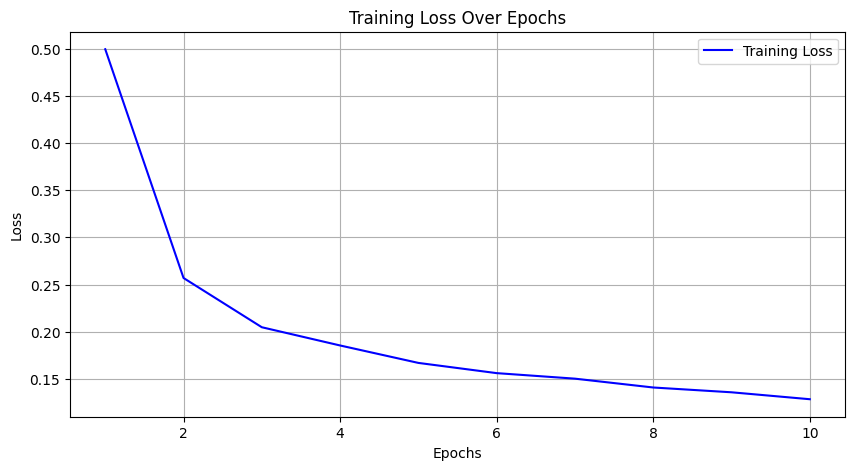

In [ ]:
# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, 'b-', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Testing THe model


In [ ]:
# Testing your model
def test_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy

accuracy = test_model(model, test_loader, device)

Test Accuracy: 97.06%


## Improving The model



In [ ]:
# Improving The model - adding epochs
class ImprovedMNISTNet(nn.Module):
    def __init__(self):
        super(ImprovedMNISTNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

# Train improved model
improved_model = ImprovedMNISTNet().to(device)
optimizer = optim.Adam(improved_model.parameters(), lr=0.001, weight_decay=1e-4)

improved_losses = []
epochs = 15

for epoch in range(epochs):
    improved_model.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = improved_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    improved_losses.append(avg_loss)
    print(f'Epoch {epoch+1} completed. Average Loss: {avg_loss:.6f}')

# Test improved model
improved_accuracy = test_model(improved_model, test_loader, device)

Epoch 1 completed. Average Loss: 0.551566
Epoch 2 completed. Average Loss: 0.285918
Epoch 3 completed. Average Loss: 0.237786
Epoch 4 completed. Average Loss: 0.209824
Epoch 5 completed. Average Loss: 0.193117
Epoch 6 completed. Average Loss: 0.188230
Epoch 7 completed. Average Loss: 0.174133
Epoch 8 completed. Average Loss: 0.170148
Epoch 9 completed. Average Loss: 0.162938
Epoch 10 completed. Average Loss: 0.156643
Epoch 11 completed. Average Loss: 0.150570
Epoch 12 completed. Average Loss: 0.146746
Epoch 13 completed. Average Loss: 0.140436
Epoch 14 completed. Average Loss: 0.143999
Epoch 15 completed. Average Loss: 0.140632
Test Accuracy: 97.56%


## Saving The model


In [ ]:
# Saving The model
torch.save(improved_model.state_dict(), 'mnist_model.pth')
print("Model saved as 'mnist_model.pth'")

# To load the model later:
# model = ImprovedMNISTNet()
# model.load_state_dict(torch.load('mnist_model.pth'))

Model saved as 'mnist_model.pth'
